# Заголовок проекта

Отдел маркетинга предоставил нам данные о 9 гипотезах для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats
from scipy import stats as st

import datetime as dt

import math

import numpy as np

In [2]:
try:
    hyp = pd.read_csv('hypothesis.csv')
except:
    hyp = pd.read_csv('/datasets/hypothesis.csv')

try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

Необходимо подготовить данные к анализу, поэтому проверим каждый датасет на наличие дубликатов и на соответсвие стандартам.

In [3]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hyp.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
hyp.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
hyp.duplicated().sum()

0

С hyp все в порядке. Нет дубликатов, и названия столбцов тоже в порядке.

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.rename(columns={'visitorId':'user_id', 'transactionId':'order_id'}, inplace=True)

In [9]:
orders.isna().sum()

order_id    0
user_id     0
date        0
revenue     0
group       0
dtype: int64

In [10]:
orders.duplicated().sum()

0

В orders пришлось лишь переименовать столбцы, для перехода на змеиный регистр и более понятное название. Дубликатов и пропусков не обнаружено.

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.duplicated().sum()

0

С visitors все хорошо, ни пропусков, ни дубликатов.

In [15]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

# Часть 1. Приоритизация гипотез

**1.1 Применим фреймворк `ICE` для приоритизации гипотез и отсортируем их по убыванию приоритета.**

In [46]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']).round(2)

In [47]:
hyp.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,40.0,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,112.0,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,40.0,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,56.0,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,4.0,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,9.0,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,3.0,1.00


**1.2 Применим фреймворк `RICE` для приоритизации гипотез и отсортируем их по убыванию приоритета.**

In [17]:
hyp['RICE'] = hyp['Reach'] * hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']

In [18]:
hyp.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,3.0


**1.3 Попробуем ответить на вопрос: как изменилась приоритизация? А также объясним произошедшие изменения.**

В методе ICE первое место по приоритизации заняла гипотеза 8: "Запустить акцию, дающую скидку на товар в день рождения", а в методе RICE гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Гипотеза 7 затрагивает всех посетителей сайта, как и гипотеза 8, однако 8-я гипотеза затрагивает всех пользователей не одномоментно и информация об акции еще должна дойти до пользователя. Этим можно объяснить 5-ю позицию 8-й гипотезе при применении метода RICE. 

Но есть и в обоих методах кое-что общее: в первую тройку гипотез по важности и там, и там входят гипотезы 7 и 0.

## Часть 2. Анализ А/В-теста

Для начала проверим сколько групп в А/В тесте, за какой период они доступны и есть ли пользователи попавшие в две группы одновременно.

In [19]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [20]:
print('Дата начала исследования:', orders['date'].min())
      
print('Дата конца исследования:', orders['date'].max())

Дата начала исследования: 2019-08-01
Дата конца исследования: 2019-08-31


In [21]:
snova_users = orders.groupby(['user_id']).agg({'group' : 'nunique', 'order_id' : 'count', 'revenue' : 'sum'}).reset_index()
print(snova_users[snova_users.group != 1]["user_id"].count())

58


Промежуточный итог: всего две группы в А/В тесте, данные предоставлены за август 2019 года и 58 пользователей попали в обе группы одновременно. Исключим их.

In [22]:
snova_users_1 = list(snova_users[snova_users.group != 1]['user_id'])
orders = orders.query('user_id not in @snova_users_1') # новый датафрейм без 58 пользователей

Теперь, исключив лишних пользователей, перейдем к самому анализу.
Попробуем получить агрегированные накапливаемые по дням данные о заказах и данные о посетителях интернет-магазина, а потом объеденить все в одну таблицу.

In [23]:
# Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders [['date', 'group']].drop_duplicates()

In [24]:
# получаем ordersAggregated с датой, группами А/В теста, числом уникальных заказов в группе теста по указанную дату включительно, 
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно, 
#суммарной выручкой заказов в группе теста по указанную дату включительно
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'order_id' : pd.Series.nunique,
'user_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [25]:
# получаем переменную visitorsAggregated с датой, группами А/В теста
# и количеством уникальных посетителей в группе теста по указанную дату включительно.
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [26]:
# объеденим все в одну таблицу и переименуем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845
5  2019-08-03     B      54      53   288850      1803
6  2019-08-04     A      77      71   388030      2562
7  2019-08-04     B      68      66   385740      2573
8  2019-08-05     A      99      92   474413      3318
9  2019-08-05     B      89      87   475648      3280


**2.1 Построим график кумулятивной выручки по группам.**

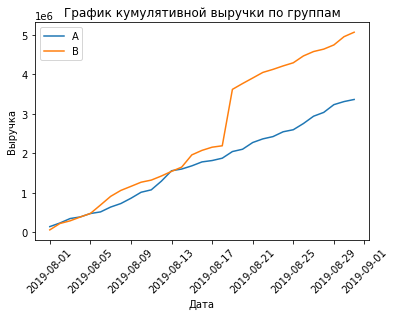

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)

plt.legend() 

На протяжении всего теста выручка увеличивается и в группе А, и в группе В, но можно также заметить скачек в группе В, который, возможно, можно объяснить о увеличении количества заказов или об увеличении их стоимости.

**2.1 Построим график кумулятивного среднего чека по группам.**

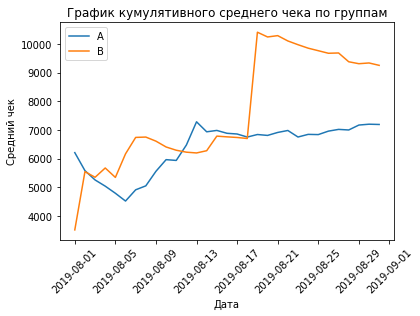

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend() 

Средний чек в группе A за первые две недели подрос и стабилизировался, а в группе B резко подскочил и стал плавно снижаться к концу теста (снова всплеск в группе В). Возможно, в группу B попали какие-то крупные заказы, судя по резкому всплеску на графике.

**2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

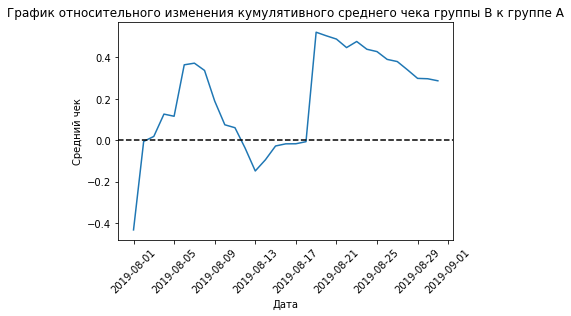

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=45)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 


Скачок все также есть - если быть точнее, он был 20-го августа. Наверное случился какой-то очень крупный заказ.

**2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам.**

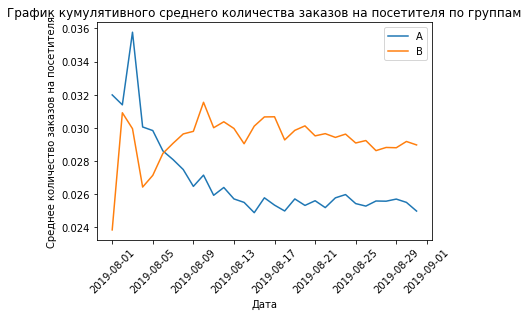

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()


В начале у группы А показатели были намного лучше, чем у группы В, однако уже начиная с конца первой недели ситуация стабилизировалась в лучшую для группы В сторону.

**2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

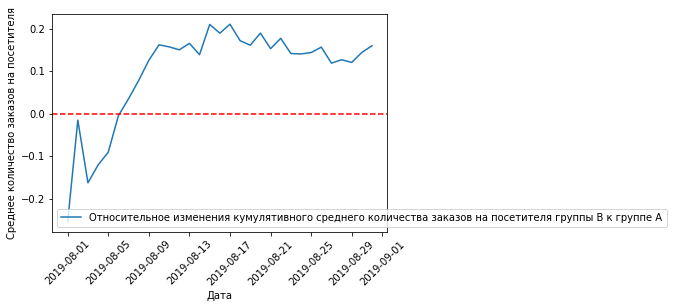

In [31]:
# объеденим все в одну таблицу
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительное изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.legend()
plt.xticks(rotation=45)

plt.axhline(y=0, color='red', linestyle='--')

При запуске исследования в первые дни В-тест колебался и проигрывал А-тесту, но затем начался рост до 20% относительно А-теста, где-то 15 августа начался небольшой спад, но все равно В-тест лучше, чем группа А. Однако серьезные выводы делать рано.

**2.6 Построим точечный график количества заказов по пользователям.**

In [32]:
# найдем число заказов по пользователям, создав новую таблицу
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0.5, 1.0, 'Гистограмма количества заказов по пользователям')

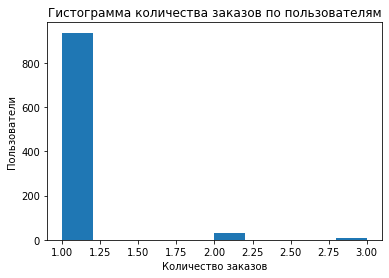

In [33]:
plt.hist(ordersByUsers['orders']);
plt.xlabel('Количество заказов')
plt.ylabel('Пользователи')
plt.title('Гистограмма количества заказов по пользователям')

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

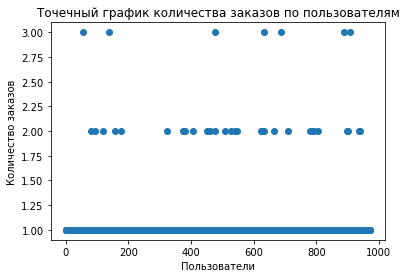

In [34]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечный график количества заказов по пользователям')

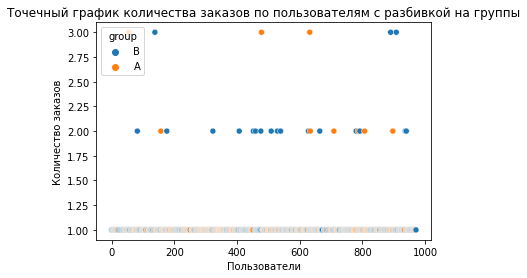

In [39]:
# теперь с разбивкой по группам
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Точечный график количества заказов по пользователям с разбивкой на группы')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
sns.scatterplot(data=orders, x=x_values, y=ordersByUsers['orders'], hue="group");

По графикам видно, что заказывают почти всегда 1 раз. Очень редко бывает 2 или 3 заказа.

**2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [36]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали более одного заказов, и не более 1% от всех пользователей совершали более двух заказов. Пользователей с двумя и тремя заказами точно можно считать аномальными.

**2.8 Построем точечный график стоимостей заказов**

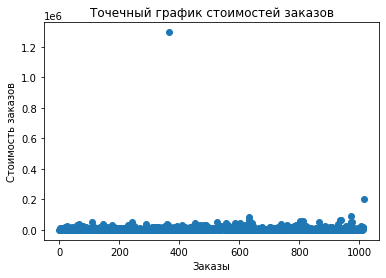

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Заказы')
plt.scatter(x_values, orders['revenue']) 

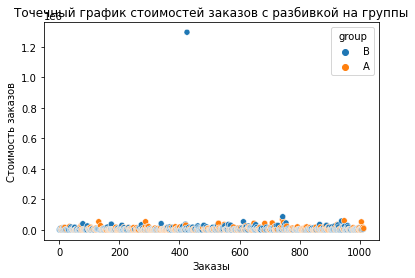

In [45]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Точечный график стоимостей заказов с разбивкой на группы')
plt.ylabel('Стоимость заказов')
plt.xlabel('Заказы')
sns.scatterplot(data=orders, x=x_values, y=orders['revenue'], hue="group");

Есть как минимум один аномальный заказ, который выбивается из колеи и скорее всего является причиной резких колебаний на предыдущих графиках.

**2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов**

In [39]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей совершали покупку на сумму более 26785 д.е., и не более 1% от всех пользователей совершали покупку на сумму более 53904 д.е.. Граница для определения аномальных заказов - 26785 д.е. и более

**2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

In [40]:
# Посчитаем агрегированные накапливаемые данные 
# по дням о посетителях групп А и В

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [41]:
# Посчитаем аггрегированные и накапливаемые данные о заказах и выручке для А и В групп
# и объединим по дате все полученные данные в одну таблицу

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Расшифровка:

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [42]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

In [43]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Пусть будут две гипотезы:

Гипотеза H0 - статистически значимых различий в количестве заказов между группами нет.

Гипотеза H1 - статистически значимые различия есть.

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Р-value меньше 0.05, и нулевую гипотезу о том, что статистически значимых различий в количестве заказов между группами нет, следует отвергнуть. 
А относительный прирост количества заказов B-теста к количеству заказов А-теста равен 16%.

**2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Теперь попробуем найти относительные различия в среднем чеке между группами:

Гипотеза H0 - статистически значимых различий в среднем чеке между группами нет.

Гипотеза H1 - статистически значимые различия есть. 

In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


p-value сильно больше 0.05, нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B значительно выше среднего чека группы A на 29%

**2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Ранее мы определяли аномальных пользователей, которые сейчас нам пригодятся: те, кто совершил 2 и более заказов и случаи, когда сумма заказа превышает 26785 д.е.

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['user_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: user_id, dtype: int64
58


Выдвигаем гипотезы:

Гипотеза Н0 - различия в количестве заказов между группами по «очищенным» данным статистически не значимы

Гипотеза Н1 - различия в количестве заказов между группами по «очищенным» данным статистически значимы

In [47]:
# Сначала подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [48]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.012
0.182


p-value меньше 0.05, поэтому отвергаем нулевую гипотезу. Относительный прирост по очищенным данным группы B к группе А ненамного увеличился и равен 18%

**2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

Выдвигаем гипотезы:

Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

In [49]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


0.646
-0.048


p-value снова больше 0.05, поэтому нулевую гипотезу не отвергаем. Относительное различие среднего чека между группами практически нулевое

**2.14 Принимаем решение по результатам теста и объясните его. Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

На основе полученных результатов можно принять решение остановить тест и признать улучшение у группы В, так как конверсия у группы В намного лучше, чем у группы А и это подтверждается графиками, не учитывая факт отсутсвия значимых различий по среднему чеку между группами.

ВЫВОДЫ:
- Имеются данные за август 2019 года, две группы теста А и В и 58 пользователей, попавшие одновременно в две группы и исключенные в дальнейшем

- Наиболее привлекательной гипотезой по RICE оказалась гипотеза 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", хотя в ICE фреймворке была другая - гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения".
- Статистически значимое различие по количеству заказов между группами есть и при сырых данных, и после очистки от аномалий. У группы В заказов больше.
- И в том, и в другом случае не наблюдается статистически значимого различия по среднему чеку между группами.
- График различия количеству заказов между группами показывает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека до фильтрации аномалий колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя.
- График различия среднего чека после фильтрации постепенно стабилизировался около 0 - значимых различий между средними чеками в разных группах нет.
- Подводя итоги, тест можно остановить. Группа В показала результаты получше. Статистически значимых различий по среднему чеку между группами нет, а вот по количеству заказов победила группа В, следовательно выручка у группы В была больше.